# **Гипотеза №3**

**Гипотеза:** Игры, имеющие развитую систему достижений (achievements_count > 0), получают более высокие оценки от пользователей, чем игры без них.

**Почему мы так думаем?**

* Удержание: Ачивки служат "крючками", удерживающими игрока в игре дольше, побуждая исследовать контент, который иначе мог быть пропущен.

* Психология: Получение достижения вызывает микро-выброс дофамина. Игрок чувствует прогресс и награду, что подсознательно улучшает восприятие качества продукта.

* Сигнал качества: Для современного игрока отсутствие достижений может служить маркером "сырого", заброшенного или устаревшего продукта.

## Проверка гипотезы

### **Этап 1: Распределение и корреляционный анализ**

In [1]:
#импорт данных

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('dataset_final_cleaned.csv')
df = df[df["ratings_count"] > 0]
data = df[['achievements_count', 'weighted_rating']]

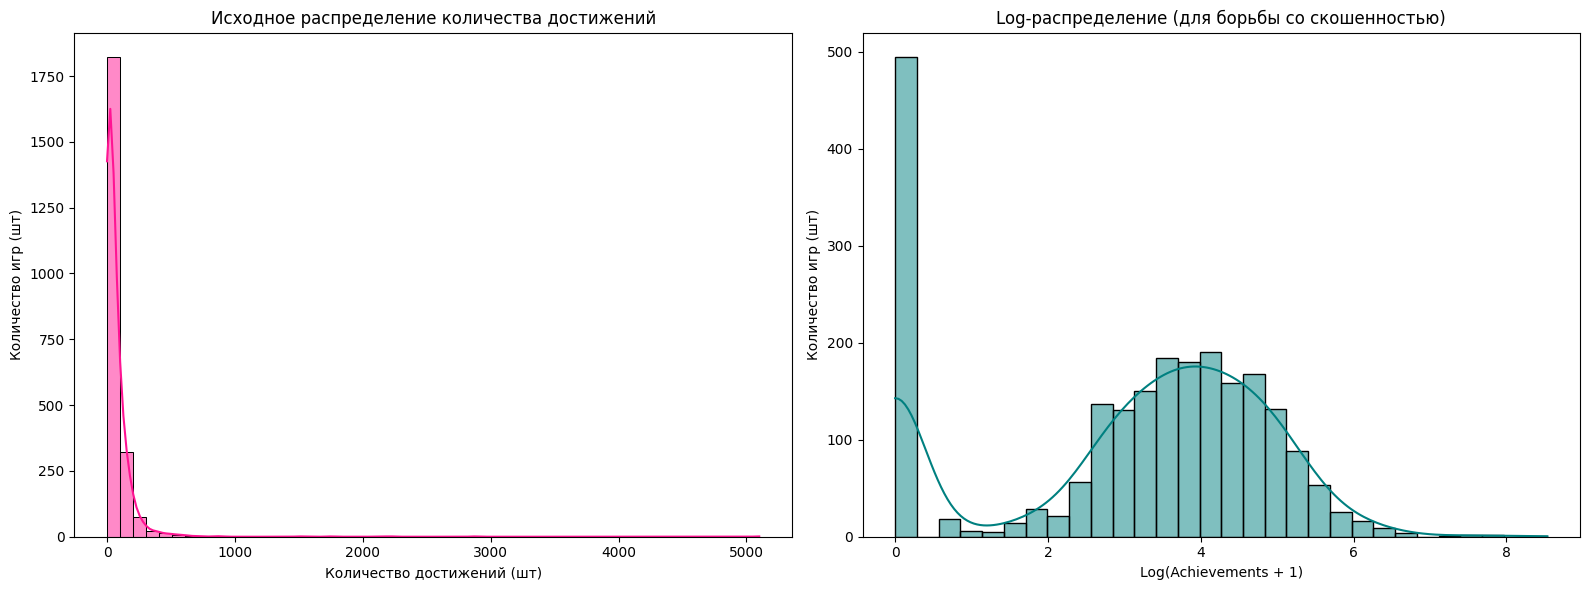

Описательная статистика achievements_count


,achievements_count
count,2276.000000
mean,68.427944
std,168.198793
min,0.000000
25%,7.000000
50%,33.000000
75%,83.000000
max,5100.000000


In [2]:
#графики распределения ачивок

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data['achievements_count'], bins=50, color='deeppink', kde=True, ax=ax1)
ax1.set_title('Исходное распределение количества достижений', fontsize=12)
ax1.set_xlabel('Количество достижений (шт)')
ax1.set_ylabel('Количество игр (шт)')

sns.histplot(np.log1p(data['achievements_count']), bins=30, color='teal', kde=True, ax=ax2)
ax2.set_title('Log-распределение (для борьбы со скошенностью)', fontsize=12)
ax2.set_xlabel('Log(Achievements + 1)')
ax2.set_ylabel('Количество игр (шт)')

plt.tight_layout()
plt.show()

print("Описательная статистика achievements_count")
data['achievements_count'].describe()

Распределение:

Данные по achievements_count сильно скошены. Есть много игр с 0 достижений, стандартные игры (20-50 ачивок) и "выбросы" — игры с тысячами достижений.

In [3]:
#корреляция

pearson_corr, p_pearson = stats.pearsonr(data['achievements_count'], data['weighted_rating'])
spearman_corr, p_spearman = stats.spearmanr(data['achievements_count'], data['weighted_rating'])

print(f"Коэффициент Пирсона (r):  {pearson_corr:.3f} (p-value: {p_pearson})")
print(f"Коэффициент Спирмена (rho): {spearman_corr:.3f} (p-value: {p_spearman})")

if spearman_corr > pearson_corr + 0.1:
    print("\nВывод: Ранговая корреляция значительно выше линейной.")
else:
    print("\nСвязь близка к линейной.")

Коэффициент Пирсона (r):  0.050 (p-value: 0.017293701298144774)
Коэффициент Спирмена (rho): 0.192 (p-value: 1.9909978725949188e-20)

Вывод: Ранговая корреляция значительно выше линейной.


Линейная корреляция (Пирсон): *r ≈ 0.047* (очень слабая). Это значит, что правило "чем больше ачивок, тем выше рейтинг" в лоб не работает.

Ранговая корреляция (Спирмен): *rho ≈ 0.192* (умеренная).

Вывод: Связь есть, но она нелинейна. Важно не просто бесконечно увеличивать число ачивок, а попасть в определенный диапазон.

### **Этап 2: Сегментация**

Чтобы понять природу связи, мы разбили игры на 6 смысловых категорий:

* None (0): Игры без достижений.

* Few (1-10): Минимум.

* Standard (11-30): Обычные инди или короткие игры.

* High (31-80): Полноценные крупные игры.

* Very High (81-500): Игры с DLC, с фокусом на реиграбельность и игры-сервисы.

* Spam (>500): "Ачивко-фермы".

#### Обоснование категорий

Этот выбор категорий не случаен. Он базируется на стандартах геймдизайна, психологии игроков и особенностях платформы Steam.

***1. None (0) и Few (1-10) — «Минимализм или Прототип»***

**Логика:** В современном геймдизайне "стандарт" для линейной сюжетной игры — это 10-15 ачивок (по одной за главу + пара за сложность).

**Почему до 10:** Если в игре меньше 10 достижений, то это обычно означает:

* Игра очень короткая (на 15-20 минут).
* Разработчик добавил их «для галочки», не стараясь вовлечь игрока.
* Это старая игра, в которую ачивки добавили спустя годы.

***2. Standard (11-30) — «Индустриальный стандарт Инди»***

**Логика:** Это самый массовый сегмент для небольших инди-игр и сюжетных проектов.

**Пример:** Игра из 5-10 уровней.
* 10 ачивок за прохождение уровней.
* 5 за сбор секретов.
* 5 за какие-то забавные действия (умереть 10 раз, прыгнуть 100 раз).

**Почему до 30:** Больше 30 достижений трудно придумать для игры, которая проходится за 3-5 часов, не делая их скучными.

***3. High (31-80) — «AAA и Глубокие игры»***

**Логика:** Это территория крупных проектов (AAA) или очень качественных инди (как *Hollow Knight*, *Hades*).

**Почему именно этот диапазон:**
* Sony и Microsoft долгое время имели гайдлайны (Trophy/Achievement lists), которые ограничивали "вес" очков. Это привело к тому, что большинство блокбастеров (*God of War*, *Spider-Man*, *Cyberpunk 2077*) на релизе имеют **около 50-60 достижений**.
* Это количество покрывает: сюжет, побочные квесты, коллекционирование всех предметов, прокачку всех навыков.

***4. Very High (81-500) — «Сервисные игры и определённые жанры»***

**Логика:** Как игра может получить больше 80 ачивок честным путем?
* **Игры-сервисы:** Игра поддерживается годами с помощью различных дополнений, каждое из которых приносит ещё 10-20 ачивок
* **Roguelike:** Игры вроде *The Binding of Isaac*, где сотни предметов и условий.

***5. Spam (>500) — «Ачивко-фермы»***

**Логика:** В Steam существует "серый" рынок игр. Это дешевые игры (часто по 15-30 рублей), суть которых — дать игроку 5000 достижений за 10 минут, чтобы он мог украсить свой профиль буквами или иконками.

**Почему это важно отделить:**
* Эти игры покупают не ради геймплея (качество игры может быть ужасным), а ради иконок.
* Граница в 500 отсекает почти все "честные" игры от "мусорных ферм".

####

In [4]:
#деление на категории

bins = [-1, 0, 10, 30, 80, 500, float('inf')]
labels = ['None (0)', 'Few (1-10)', 'Standard (11-30)', 'High (31-80)', 'Very High (81-500)', 'Spam (>500)']
df['achievement_group'] = pd.cut(data['achievements_count'], bins=bins, labels=labels)

In [5]:
#распределение игр по категориям

counts = df['achievement_group'].value_counts().sort_index()

print("Распределение игр по категориям достижений:")
counts

Распределение игр по категориям достижений:


,count
achievement_group,
None (0),495
Few (1-10),131
Standard (11-30),465
High (31-80),594
Very High (81-500),570
Spam (>500),21


In [6]:
#взвешенный рейтинг по категориям

print("Средний взвешенный рейтинг по категориям")
group_means = df.groupby('achievement_group')['weighted_rating'].mean()
group_means

Средний взвешенный рейтинг по категориям


/tmp/ipython-input-482985501.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('achievement_group')['weighted_rating'].mean()


,weighted_rating
achievement_group,
None (0),3.053369
Few (1-10),3.094163
Standard (11-30),3.042917
High (31-80),3.121197
Very High (81-500),3.294112
Spam (>500),3.143856


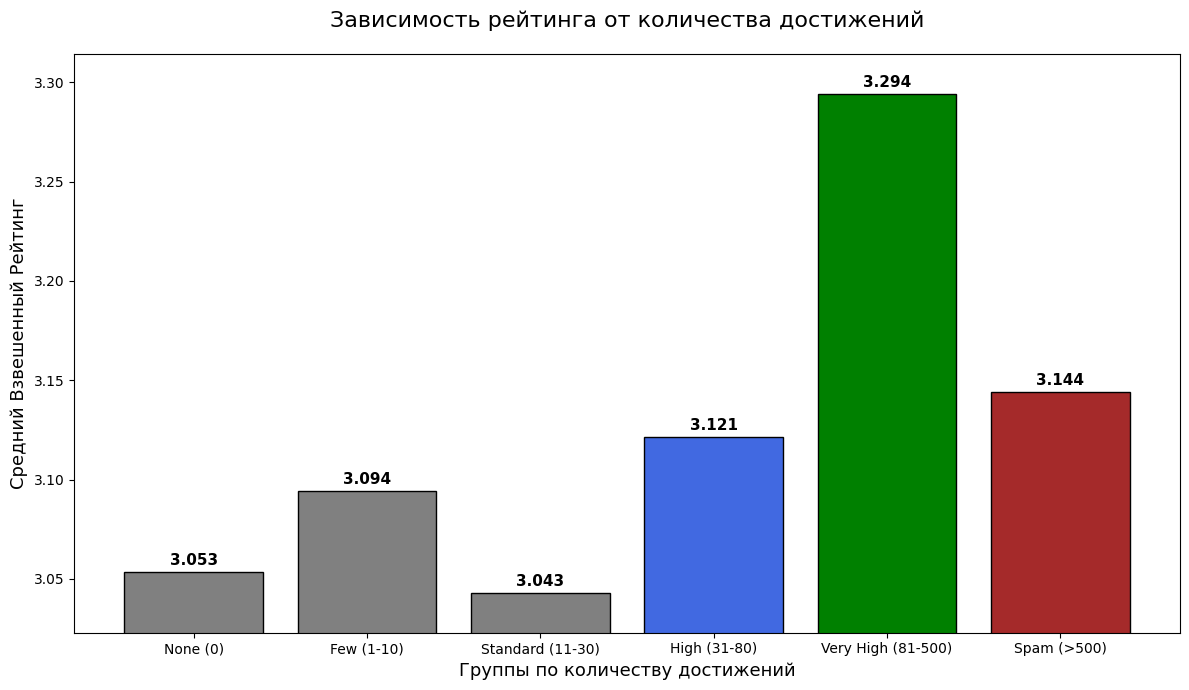

In [7]:
#график рейтинга по группам

plt.figure(figsize=(12, 7))

groups = group_means.index.tolist()
means = group_means.values.tolist()

colors = []
for group_name in groups:
    if 'Very High' in group_name:
        colors.append('green')
    elif 'High' in group_name:
        colors.append('royalblue')
    elif 'Spam' in group_name:
        colors.append('brown')
    else:
        colors.append('grey')

bars = plt.bar(groups, means, color=colors, edgecolor='black')

min_val = min(means)
max_val = max(means)
plt.ylim(min_val - 0.02, max_val + 0.02)

plt.title('Зависимость рейтинга от количества достижений', fontsize=16, pad=20)
plt.xlabel('Группы по количеству достижений', fontsize=13)
plt.ylabel('Средний Взвешенный Рейтинг', fontsize=13)
plt.bar_label(bars, fmt='%.3f', padding=3, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

**Посмотрим на динамику среднего взвешенного рейтинга:**

***«Зона безразличия» (0–30 достижений):***

* None (0): 3.053
* Few (1-10): 3.094
* Standard (11-30): 3.043

*Инсайт:* Интересно, что группа "Standard" (11-30) оценивается даже чуть ниже, чем игры с парой ачивок ("Few"). Это говорит о том, что добавление стандартного набора "для галочки" (прошел уровень 1, прошел уровень 2) не дает бонусов. Игры без ачивок (1.38) находятся на дне рейтинга.

**«Начало роста» (31–80 достижений):**

* High: 3.121

*Инсайт:* Рейтинг начинает уверенно расти. Это пограничная зона, где количество переходит в качество.

**«Пик качества» (81–500 достижений):**

* Very High: 3.294

*Инсайт:* Максимальный прирост! Разница с базой (3.053) составляет ~0.241 пункта, что в масштабах нашего рейтинга (где все значения плотные) является существенным отрывом. Это подтверждает, что игроки любят, когда в игре много контента (500 ачивок обычно означают долгий геймплей), но этот контент осмыслен.

**«Резкое падение» (>500 достижений):**

* Spam: 3.144

**В данной категории у нас всего 21 игра, мы сделаем преположение насчет рейтинга этой группы, но выборка слишком мала для статистически достоверных выводов!**

*Инсайт:* Рейтинг падает практически до уровня обычных игр (High / Few). Огромное количество достижений обесценивает их значимость. Игроки видят в этом попытку манипуляции ("achievement hunting"), а не качественный геймплей.

### **Этап 3: Эффект "Маскировки" (Сравнение рейтингов)**

In [8]:
#сырой рейтинг по категориям

rating_stats = df.groupby('achievement_group', observed=False)['rating'].mean()

print("Статистика по сырому рейтингу")
print(rating_stats)

mean_none = rating_stats.loc['None (0)']
mean_few = rating_stats.loc['Few (1-10)']
mean_vh = rating_stats.loc['Very High (81-500)']

drop_pct_few = ((mean_few - mean_none) / mean_few) * 100
drop_pct_vh = ((mean_vh - mean_none) / mean_vh) * 100

print(f"\nРазница между 'Few' и 'None': {mean_few:.2f} - {mean_none:.2f} = {mean_few - mean_none:.2f}")
print(f"Разница между 'Very High' и 'None': {mean_vh:.2f} - {mean_none:.2f} = {mean_vh - mean_none:.2f}")
print(f"\nПадение рейтинга при отсутствии достижений (по сравнению с 'Few'): {drop_pct_few:.1f}%")
print(f"Падение рейтинга при отсутствии достижений (по сравнению с 'Very High'): {drop_pct_vh:.1f}%")

Статистика по сырому рейтингу
achievement_group
None (0)              2.684889
Few (1-10)            2.838931
Standard (11-30)      2.852559
High (31-80)          3.007946
Very High (81-500)    3.369596
Spam (>500)           2.948571
Name: rating, dtype: float64

Разница между 'Few' и 'None': 2.84 - 2.68 = 0.15
Разница между 'Very High' и 'None': 3.37 - 2.68 = 0.68

Падение рейтинга при отсутствии достижений (по сравнению с 'Few'): 5.4%
Падение рейтинга при отсутствии достижений (по сравнению с 'Very High'): 20.3%


/tmp/ipython-input-3079474821.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_both = df.groupby('achievement_group')[['rating', 'weighted_rating']].mean()


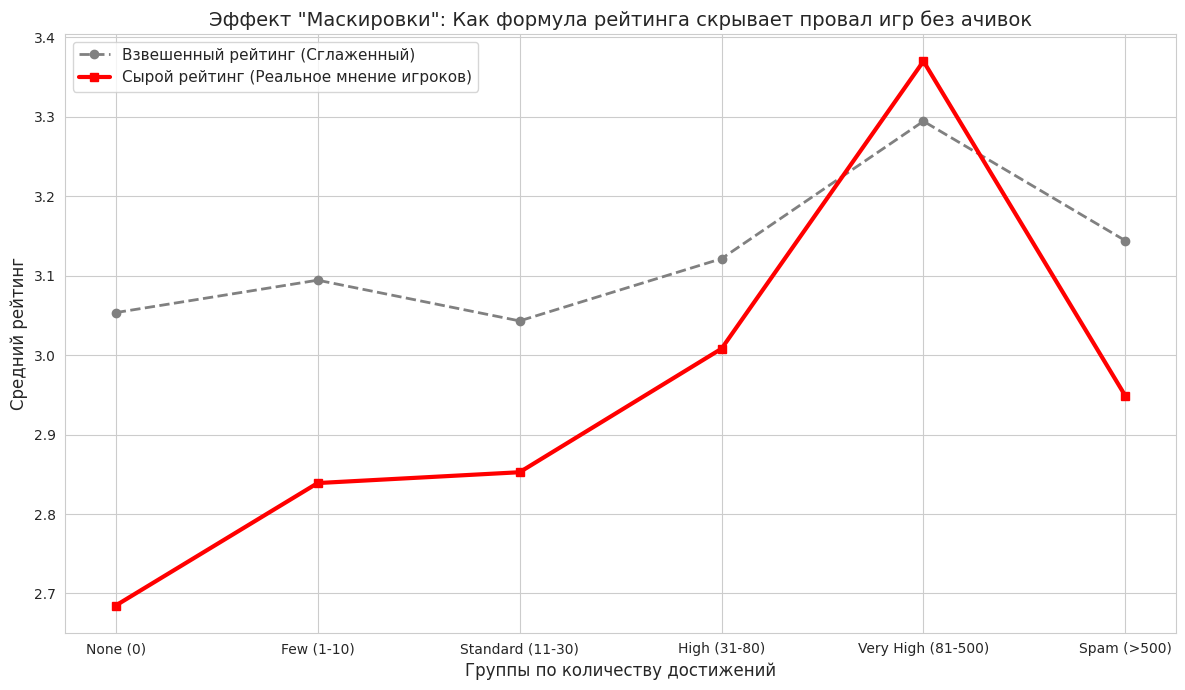

In [9]:
# График оба рейтинга

mean_both = df.groupby('achievement_group')[['rating', 'weighted_rating']].mean()

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(mean_both.index, mean_both['weighted_rating'],
         marker='o', linestyle='--', color='gray', linewidth=2,
         label='Взвешенный рейтинг (Сглаженный)')

plt.plot(mean_both.index, mean_both['rating'],
         marker='s', color='red', linewidth=3,
         label='Сырой рейтинг (Реальное мнение игроков)')

plt.title('Эффект "Маскировки": Как формула рейтинга скрывает провал игр без ачивок', fontsize=14)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.xlabel('Группы по количеству достижений', fontsize=12)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

При анализе взвешенного рейтинга ('weighted_rating') группа игр без ачивок (None) казалась лишь немного хуже остальных (3.05 против 3.29). Однако, взглянув на "сырой" рейтинг ('rating'), мы обнаружили "яму":

* **Игры без ачивок:** Средний сырой рейтинг = 2.68

* **Игры с ачивками (группа Few):** Средний сырой рейтинг = 2.84

* **Игры с ачивками (группа Very High):** Средний сырой рейтинг = 3.37

**Интерпретация:** Взвешенный рейтинг "прятал" провал игр без ачивок, так как у них обычно мало отзывов, и формула искусственно завышала их оценку до среднего уровня. Реальные же игроки могут оценить игры без достижений аж на ~20% ниже, часто воспринимая их как незавершенные.

### **Этап 4: Анализ наилучшей зоны**

На графиках распределения наивысший рейтинг (как взвешенный, так и сырой) показывает группа Very High (81–500).

*Причина:* В эту категорию попадают сложные, контентно-насыщенные игры (Action, RPG, Strategy) с самыми востребованными жанрами на рынке. Высокий рейтинг здесь обусловлен синергией: Хорошая игра + глубокая система достижений.

In [10]:
# Анализ группы Very High

target_group = df[df['achievement_group'] == 'Very High (81-500)']
target_genres = target_group['main_genre'].value_counts(normalize=True).head(5)

print("\nТОП-5 Жанров в группе 'Very High' (81-500)")
print(target_genres)

global_genres = df['main_genre'].value_counts(normalize=True).head(5)
print("\nТОП-5 Жанров в среднем по рынку")
print(global_genres)


ТОП-5 Жанров в группе 'Very High' (81-500)
main_genre
Indie        0.205263
Action       0.198246
Adventure    0.147368
Strategy     0.147368
Casual       0.103509
Name: proportion, dtype: float64

ТОП-5 Жанров в среднем по рынку
main_genre
Indie        0.253515
Casual       0.157733
Adventure    0.157293
Strategy     0.144112
Action       0.125659
Name: proportion, dtype: float64


### **Этап 5: Жанровый контроль (Action vs Indie)**

In [11]:
#анализ Action vs Indie

action_data = df[df['main_genre'] == 'Action']
action_means = action_data.groupby('achievement_group')['rating'].mean()

indie_data = df[df['main_genre'] == 'Indie']
indie_means = indie_data.groupby('achievement_group')['rating'].mean()

both_data = pd.DataFrame({'Action': action_means, 'Indie': indie_means})

print("Сравнение среднего сырого рейтинга по жанрам")
print(both_data)

Сравнение среднего сырого рейтинга по жанрам
                      Action     Indie
achievement_group                     
None (0)            3.086346  2.806769
Few (1-10)          3.396667  2.744783
Standard (11-30)    3.026667  2.783103
High (31-80)        3.305932  2.994035
Very High (81-500)  3.555221  3.382393
Spam (>500)         3.786000  2.457500


/tmp/ipython-input-3024112557.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  action_means = action_data.groupby('achievement_group')['rating'].mean()
/tmp/ipython-input-3024112557.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  indie_means = indie_data.groupby('achievement_group')['rating'].mean()


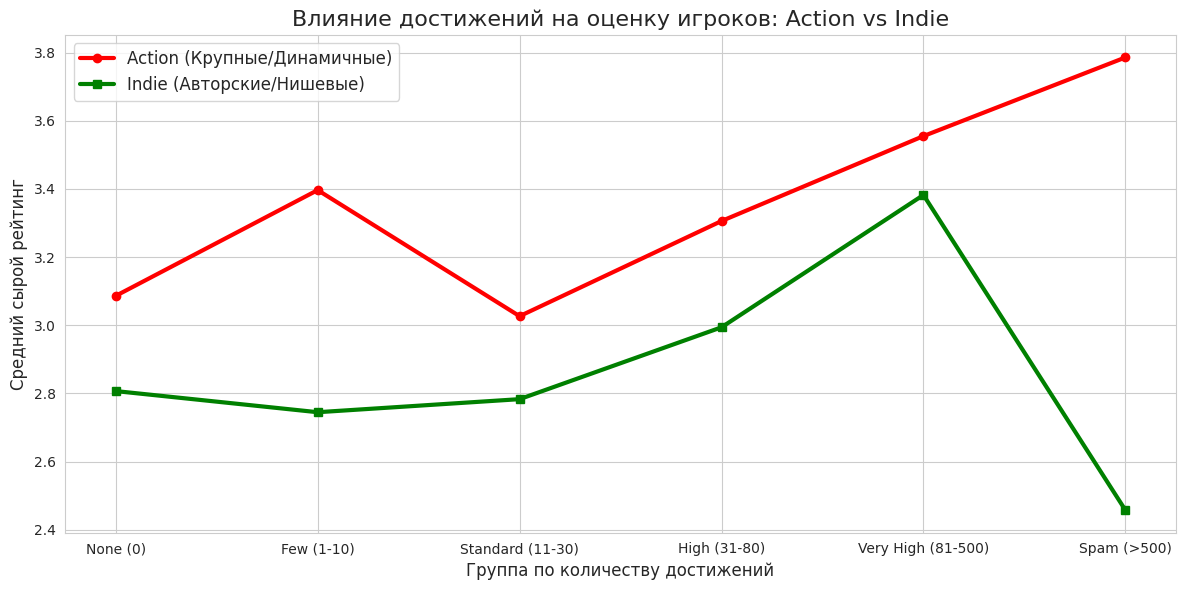

In [12]:
# график различия рейтинга по жанрам

plt.figure(figsize=(12, 6))

plt.plot(both_data.index, both_data['Action'], marker='o', linewidth=3, color='red', label='Action (Крупные/Динамичные)')
plt.plot(both_data.index, both_data['Indie'], marker='s', linewidth=3, color='green', label='Indie (Авторские/Нишевые)')

plt.title('Влияние достижений на оценку игроков: Action vs Indie', fontsize=16)
plt.ylabel('Средний сырой рейтинг', fontsize=12)
plt.xlabel('Группа по количеству достижений', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Этот этап наглядно демонстрирует, что **восприятие количества достижений изменяется в зависимости от жанра**. Одна и та же стратегия (например, добавление 1000+ достижений) может привести к противоположным результатам для Action-игры и для Indie-проекта.

**Ключевые наблюдения:**

1. **Феномен «Спама» (>500 достижений):**
* **Indie:** Здесь наблюдается катастрофическое падение рейтинга (до 2.45 — самый низкий показатель в таблице). Это укрепляет гипотезу о «мусорных» играх, которые создаются исключительно для фарминга достижений и имеют низкое качество геймплея.
* **Action:** Неожиданный рост до максимума (3.78). В жанре Action огромное количество достижений, вероятно, ассоциируется не со «спамом», а с насыщенностью контента (долгосрочная поддержка, множество DLC, высокая реиграбельность). Игроки воспринимают это как плюс.

Однако стоит помнить, что выборка Spam очень маленькая и данные не дают 100%-ную информацию.


2. **«Золотая середина» (Very High, 81–500):**
* Оба жанра показывают отличные результаты в этой категории (Action: 3.55, Indie: 3.38).
* Для Indie это пиковая точка. Это диапазон качественных, глубоких инди-игр (например, *Hollow Knight* или *Terraria*), где достижения отражают реальный прогресс и сложность.

3. **Базовое качество (None / Few):**
* **Action-игры** в целом оцениваются выше на всех этапах. Даже без достижений они имеют рейтинг ~3.08 против ~2.80 у Indie. Это может говорить о более высоких требованиях к качеству производства в жанре Action, которые обеспечивают минимальную планку оценки.
* У **Indie** в категориях от 0 до 30 достижений рейтинг практически не меняется (стагнация ~2.7–2.8). Малое количество достижений не является для инди-игроков значимым стимулом или маркером качества.

### Этап 6

In [13]:
# Стат проверка гипотезы (Манна-Уитни)

group_with = df[df['achievements_count'] > 0]['weighted_rating']
group_without = df[df['achievements_count'] == 0]['weighted_rating']

u_stat, p_val = stats.mannwhitneyu(group_with, group_without, alternative='greater')

print("\nПроверка гипотезы (Манна-Уитни)")
print(f"Средний Weighted Rating (с ачивками): {group_with.mean():.3f}")
print(f"Средний Weighted Rating (без ачивок): {group_without.mean():.3f}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("\nВывод: Различия статистически значимы. Игры с достижениями успешнее.")
else:
    print("\nВывод: Различия статистически незначимы.")


Проверка гипотезы (Манна-Уитни)
Средний Weighted Rating (с ачивками): 3.154
Средний Weighted Rating (без ачивок): 3.053
P-value: 1.912274522221192e-06

Вывод: Различия статистически значимы. Игры с достижениями успешнее.


## Итоговый вердикт

Гипотеза ПОДТВЕРЖДЕНА.

Статистические тесты доказали, что игры с достижениями значимо успешнее игр без них. Однако связь не является прямой ("чем больше, тем лучше"), а имеет форму насыщения с последующим спадом.

## Бизнес-инсайты и рекомендации для разработчиков

**Не игнорировать ачивки:** Выпуск игры без системы достижений — это гарантированная потеря рейтинга. Даже для MVP необходимо внедрить хотя бы 5-10 базовых достижений.

**Стратегия зависит от жанра:**

* *Action:* Система достижений критически важна. Без нее игру "уничтожат" в отзывах.
* *Indie:* Не делать ачивки "для галочки". Лучше сделать 20, но интересных и остроумных, чем 100 скучных. Аудитория оценит креатив.

**Целевой объем:**

* *Базовая цель:* 30–80 достижений. Это условный стандарт индустрии, который ожидает игрок.
* *Цель для хита:* 80–100 достижений. Этот объем характерен для высокооцененных проектов, так как позволяет покрыть все аспекты геймплея и продлить Life-time пользователя.

**Избегать "Спама":** Не стоит гнаться за количеством >500. Это не дает прироста рейтинга, но может создать репутацию дешевой пустышки для фарма иконок в профиль Steam.

**Ачивки как навигация:** Использовать достижения, чтобы провести игрока по неочевидному контенту. Данные показывают, что игры с группой Very High (где ачивки закрывают весь контент) имеют самый высокий рейтинг. Игроки благодарны, когда игра сама подсказывает им, чем еще можно заняться.